In [1]:
import pandas as pd
import numpy as np

df = pd.read_excel('data_432.xlsx')

# convert multiple choice answers to categorie values
df.loc[df["smoke"] == 2, "smoke"] = 0 
df.loc[df["sex"] == 1, "sex"] = "Male"
df.loc[df["sex"] == 2, "sex"]= "Female"


df.loc[df["drinking_freq"] == 1, "drinking_freq"] = "Daily"
df.loc[df["drinking_freq"] == 2, "drinking_freq"] = "Weekly"
df.loc[df["drinking_freq"] == 3, "drinking_freq"] = "Monthly"
df.loc[df["drinking_freq"] == 4, "drinking_freq"] = "Yearly"
df.loc[df["drinking_freq"] == 5, "drinking_freq"] = "Rarely"

df.loc[df["parent_freq"] == 1, "parent_freq"] = "Very often"
df.loc[df["parent_freq"] == 2, "parent_freq"] = "Often"
df.loc[df["parent_freq"] == 3, "parent_freq"] = "Not often"
df.loc[df["parent_freq"] == 4, "parent_freq"] = "Barely"
df.loc[df["parent_freq"] == 5, "parent_freq"] = "Never"

df.loc[df["eating_2"] == 1, "eating_2"] = "Always"
df.loc[df["eating_2"] == 2, "eating_2"] = "Often"
df.loc[df["eating_2"] == 3, "eating_2"] = "Sometimes"
df.loc[df["eating_2"] == 4, "eating_2"] = "Never"

df.loc[df["stress_level"] == 1, "stress_level"] = "Very stress"
df.loc[df["stress_level"] == 2, "stress_level"] = "Stress"
df.loc[df["stress_level"] == 3, "stress_level"] = "Not too stress"
df.loc[df["stress_level"] == 4, "stress_level"] = "Never stress"

df.loc[df["liver_cond"] == 2, "liver_cond"] = 0 

df.loc[df["workout_freq"] == 1, "workout_freq"] = "Very often"
df.loc[df["workout_freq"] == 2, "workout_freq"] = "Often"
df.loc[df["workout_freq"] == 3, "workout_freq"] = "Not often"
df.loc[df["workout_freq"] == 4, "workout_freq"] = "Barely"
df.loc[df["workout_freq"] == 5, "workout_freq"] = "Never"

df = df.dropna()
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 423 entries, 0 to 431
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   423 non-null    int64  
 1   age                  423 non-null    float64
 2   sex                  423 non-null    object 
 3   weight               423 non-null    float64
 4   hight                423 non-null    int64  
 5   smoke                423 non-null    int64  
 6   drinking_freq        423 non-null    object 
 7   month_drinking_freq  423 non-null    float64
 8   drinking_legth       423 non-null    int64  
 9   parent_freq          423 non-null    object 
 10  eating_2             423 non-null    object 
 11  stress_level         423 non-null    object 
 12  sleep_length         423 non-null    int64  
 13  liver_cond           423 non-null    int64  
 14  tolerance            423 non-null    int64  
 15  workout_freq         423 non-null    obj

,id,age,sex,weight,hight,smoke,drinking_freq,month_drinking_freq,drinking_legth,parent_freq,eating_2,stress_level,sleep_length,liver_cond,tolerance,workout_freq
0,1,23.0,Male,107.0,192,1,Weekly,4.0,3,Very often,Often,Never stress,7,0,12,Often
1,2,22.0,Female,49.0,160,1,Weekly,5.0,2,Very often,Always,Not too stress,7,0,3,Not often
2,3,23.0,Male,56.0,175,1,Weekly,8.0,3,Not often,Always,Not too stress,8,0,8,Barely
3,4,21.0,Female,53.0,170,0,Weekly,4.0,2,Barely,Often,Not too stress,8,0,2,Barely
4,5,53.0,Female,57.0,162,0,Monthly,1.0,2,Not often,Never,Stress,6,0,50,Not often
5,6,21.0,Female,50.0,166,0,Weekly,8.0,3,Barely,Often,Not too stress,8,0,20,Barely
6,7,23.0,Male,80.0,180,1,Daily,28.0,3,Very often,Always,Very stress,6,1,20,Often
7,8,23.0,Male,105.0,180,1,Weekly,4.0,4,Often,Often,Never stress,10,0,35,Often
8,9,23.0,Male,80.0,173,1,Monthly,2.0,3,Very often,Always,Never stress,5,0,100,Very often
9,10,22.0,Female,48.5,161,0,Monthly,2.0,1,Barely,Often,Stress,8,0,5,Not often


In [2]:
df['tolerance'] = df['tolerance'].apply(lambda x: np.random.randint(35,60) if x >= 60 else x)
df_enc = pd.get_dummies(df, columns = ['sex', 'drinking_freq', 'parent_freq', 'eating_2', 'stress_level',
                                      'workout_freq'])

In [9]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for k in range(1, 30):
    kmeans = KMeans(init='k-means++', n_clusters=k, n_init=10, max_iter=100, random_state=88)
    kmeans.fit(df_enc)
    wcss.append(kmeans.inertia_)

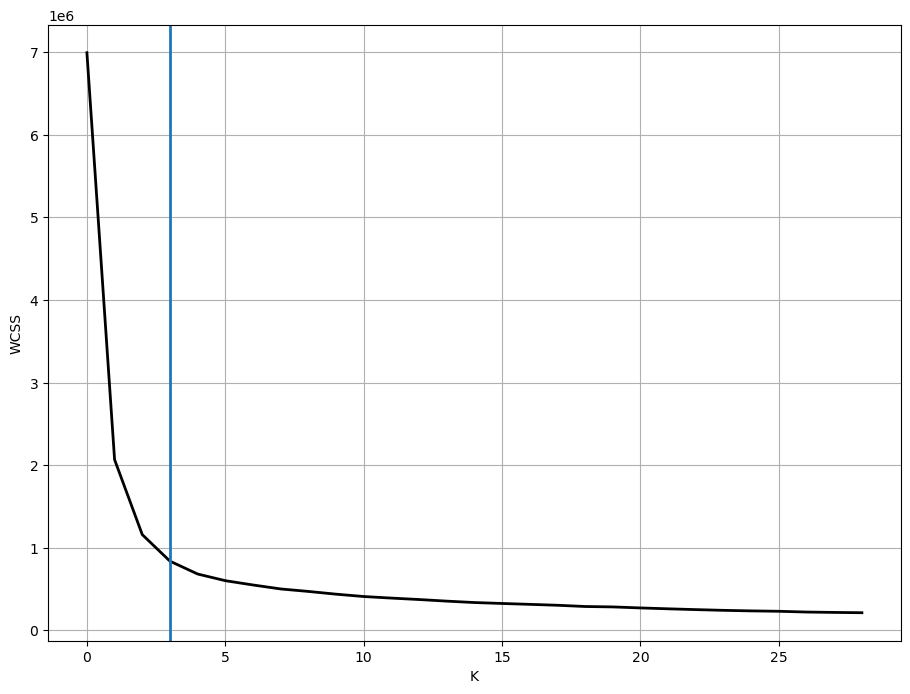

In [19]:
plt.figure(figsize=(11,8))
plt.plot(wcss, linewidth=2, color='black')
plt.axvline(x=3, linewidth=2)
plt.xlabel('K')
plt.ylabel('WCSS')
plt.grid(axis='both')
plt.show()

In [20]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df_enc)

/Users/chakwahq/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [23]:
# Getting the cluster labels
labels = kmeans.labels_

# Attaching the labels to the original data
df_enc['Cluster'] = labels

# Viewing the clusters
df_enc.head(10)

,id,age,weight,hight,smoke,month_drinking_freq,drinking_legth,sleep_length,liver_cond,tolerance,...,stress_level_Never stress,stress_level_Not too stress,stress_level_Stress,stress_level_Very stress,workout_freq_Barely,workout_freq_Never,workout_freq_Not often,workout_freq_Often,workout_freq_Very often,Cluster
0,1,23.0,107.0,192,1,4.0,3,7,0,12,...,1,0,0,0,0,0,0,1,0,0
1,2,22.0,49.0,160,1,5.0,2,7,0,3,...,0,1,0,0,0,0,1,0,0,0
2,3,23.0,56.0,175,1,8.0,3,8,0,8,...,0,1,0,0,1,0,0,0,0,0
3,4,21.0,53.0,170,0,4.0,2,8,0,2,...,0,1,0,0,1,0,0,0,0,0
4,5,53.0,57.0,162,0,1.0,2,6,0,50,...,0,0,1,0,0,0,1,0,0,0
5,6,21.0,50.0,166,0,8.0,3,8,0,20,...,0,1,0,0,1,0,0,0,0,0
6,7,23.0,80.0,180,1,28.0,3,6,1,20,...,0,0,0,1,0,0,0,1,0,0
7,8,23.0,105.0,180,1,4.0,4,10,0,35,...,1,0,0,0,0,0,0,1,0,0
8,9,23.0,80.0,173,1,2.0,3,5,0,39,...,1,0,0,0,0,0,0,0,1,0
9,10,22.0,48.5,161,0,2.0,1,8,0,5,...,0,0,1,0,0,0,1,0,0,0


In [27]:
df_enc['Cluster']

0      0
1      0
2      0
3      0
4      0
      ..
427    2
428    2
429    2
430    2
431    2
Name: Cluster, Length: 423, dtype: int32